In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import yaml 
import pandas as pd
from scipy.stats import lognorm

In [24]:
with open('params.yaml', 'r') as file:
    config = yaml.safe_load(file)

severity_mu = config['severity_mu']
severity_sigma = config['severity_sigma']
lambda_rate = config['lambda_rate']
n_simulations = 50_000


In [25]:
np.random.seed(42)

total_disruption_costs = []

for _ in range(n_simulations):
    num_disruptions = np.random.poisson(lam=1 / lambda_rate)
    disruption_severities = lognorm(s=severity_sigma, scale=np.exp(severity_mu)).rvs(num_disruptions)
    total_disruption_costs.append(disruption_severities.sum())

total_disruption_costs = np.array(total_disruption_costs)


In [26]:
empirical_data = pd.read_csv("./empirical_data.csv")
empirical_costs = empirical_data['cost'].dropna()  


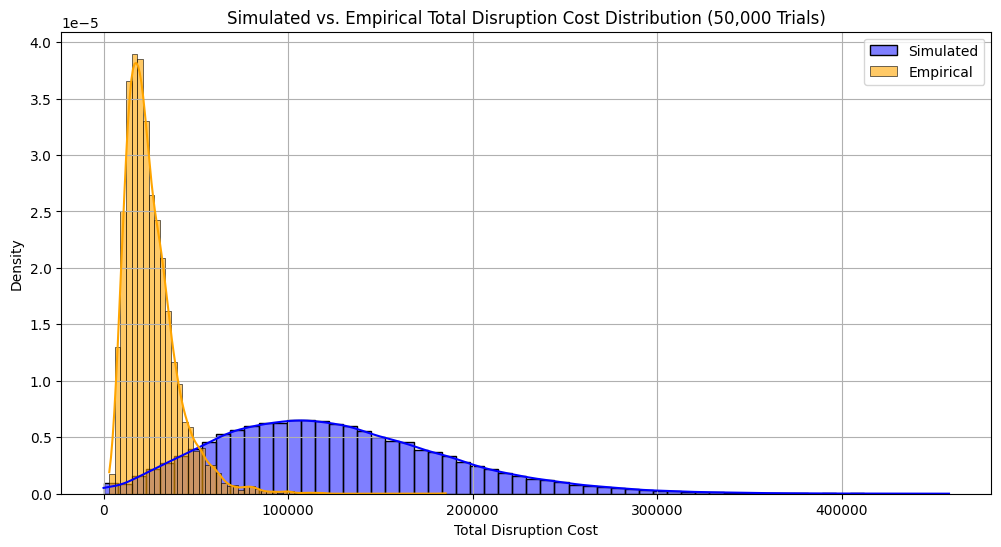

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(total_disruption_costs, bins=60, kde=True, color='blue', stat='density', label='Simulated')
sns.histplot(empirical_costs, bins=60, kde=True, color='orange', stat='density', label='Empirical', alpha=0.6)

plt.title("Simulated vs. Empirical Total Disruption Cost Distribution (50,000 Trials)")
plt.xlabel("Total Disruption Cost")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## Comparison 

- Visual Discrepancy: The image displays two distinct distributions. The "Simulated" distribution (blue) is much wider and has a lower peak density compared to the "Empirical" distribution (orange).
- Shape: Both distributions appear to be right-skewed, which is common for cost data where there are many small costs and a few very large ones. However, the simulated distribution shows a much longer and fatter tail, indicating a higher probability of very large disruption costs in the simulation compared to the empirical data.
- Mode/Peak: The empirical distribution peaks at a much lower total disruption cost (around $10,000 - 20,000) compared to the simulated distribution, which peaks at a higher cost (around $100,000).
- Spread: The simulated distribution exhibits a significantly larger spread or variance in total disruption costs than the empirical data. The empirical data is much more concentrated around its mean/median.

## Potential Reasons for Differences

- Parameter Mismatch: The parameters (severity_mu, severity_sigma, lambda_rate) used in the Monte Carlo simulation might not accurately reflect the real-world processes generating the empirical costs. They might be overestimated, leading to higher and more variable simulated costs.
- Model Misspecification: The chosen distributions (Poisson for number of disruptions, log-normal for severity) might not fully capture the underlying real-world phenomena. There might be other factors influencing disruption costs that are not accounted for in the current simulation model.
- Insufficient Empirical Data: The empirical data might be limited or not fully representative of the true underlying distribution of disruption costs, especially for rare, high-impact events.
- Tail Behavior: The significant difference in the tails of the distributions suggests that the simulation predicts a higher likelihood of extreme disruption costs than has been historically observed in the empirical data. This could be a strength (if the simulation is capturing rare events that haven't occurred empirically yet) or a weakness (if the model is overly pessimistic).

In [28]:
print("Simulation Summary (50,000 Trials):")
print(f"Mean: ${total_disruption_costs.mean():,.2f}")
print(f"Median: ${np.median(total_disruption_costs):,.2f}")
print(f"95th Percentile: ${np.percentile(total_disruption_costs, 95):,.2f}")


Simulation Summary (50,000 Trials):
Mean: $124,766.89
Median: $118,014.99
95th Percentile: $239,268.59
